<a href="https://colab.research.google.com/github/Dopaminic/AI_python/blob/main/AEwithCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0   

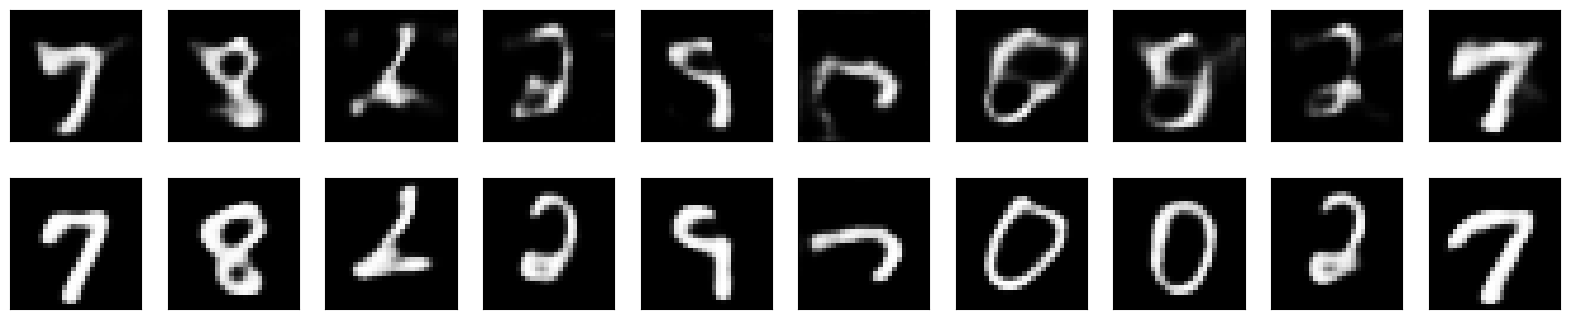

In [ ]:
from keras import layers
from keras.datasets import mnist
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

def display(array1, array2):
  n = 10
  indices = np.random.randint(len(array1), size=n)
  images1 = array1[indices, :]
  images2 = array2[indices, :]
  plt.figure(figsize=(20, 4))
  for i, (image1, image2) in enumerate(zip(images1, images2)):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(image1.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(image2.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

def preprocess(array):
  array = array.astype("float32") / 255.0
  array = array.reshape((array.shape[0], 28, 28, 1))
  return array

def noise(array):
  noise_factor = 0.4
  noisy_array = array + noise_factor * np.random.normal(
  loc=0.0, scale=1.0, size=array.shape
  )
  return np.clip(noisy_array, 0.0, 1.0)

input = layers.Input(shape=(28, 28, 1))
# Encoder
y1 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
y2 = layers.MaxPooling2D((2, 2), padding="same")(y1)
y3 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(y2)
y4 = layers.MaxPooling2D((2, 2), padding="same")(y3)
y5 = layers.Flatten()(y4)
y = layers.Dense(32)(y5)

# Decoder
z1 = layers.Dense(1568)(y)
z2 = layers.Reshape((7,7,32))(z1)
z3 = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu",
padding="same")(z2)
z4 = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu",
padding="same")(z3)
z = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(z4)

# Autoencoder
autoencoder = Model(input, z)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

(train_data, _), (test_data, _) = mnist.load_data()
# Normalize and reshape the data
train_data_n = preprocess(train_data)
test_data_n = preprocess(test_data)

#generate noisy images
noisy_test = noise(test_data_n)

hist = autoencoder.fit(
  x=train_data_n,
  y=train_data_n,
  epochs=2,
  batch_size=128,
  shuffle=True,
  validation_data=(test_data_n, test_data_n),
)

predictions = autoencoder.predict(test_data_n)
noise_rslt = autoencoder.predict(noisy_test)
display(noise_rslt, predictions)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1568)              0   

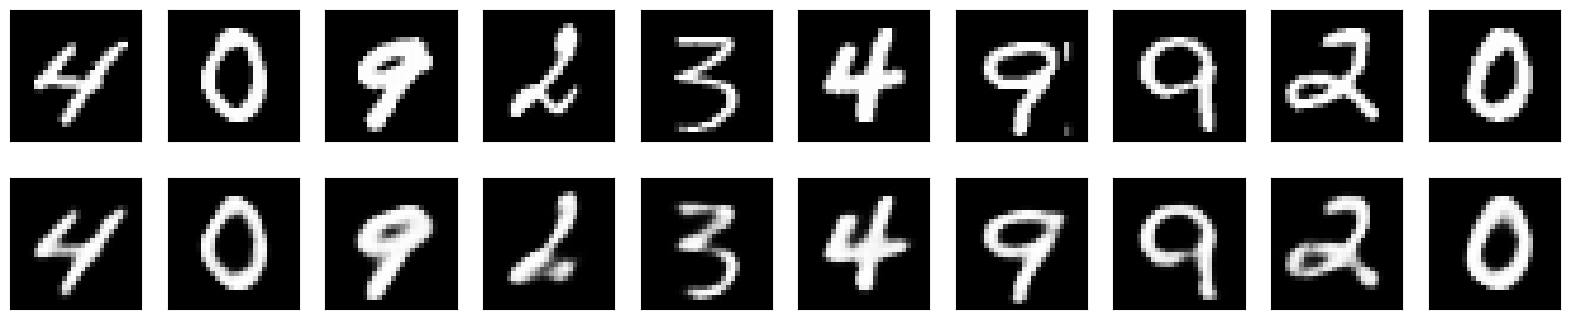

In [ ]:
from keras import layers
from keras.datasets import mnist
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

def display(array1, array2):
  n = 10
  indices = np.random.randint(len(array1), size=n)
  images1 = array1[indices, :]
  images2 = array2[indices, :]
  plt.figure(figsize=(20, 4))
  for i, (image1, image2) in enumerate(zip(images1, images2)):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(image1.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(image2.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

def preprocess(array):
  array = array.astype("float32") / 255.0
  array = array.reshape((array.shape[0], 28, 28, 1))
  return array

input = layers.Input(shape=(28, 28, 1))
# Encoder
y1 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
y2 = layers.MaxPooling2D((2, 2), padding="same")(y1)
y3 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(y2)
y4 = layers.MaxPooling2D((2, 2), padding="same")(y3)
y5 = layers.Flatten()(y4)
y = layers.Dense(32)(y5)

# Decoder
z1 = layers.Dense(1568)(y)
z2 = layers.Reshape((7,7,32))(z1)
z3 = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu",
padding="same")(z2)
z4 = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu",
padding="same")(z3)
z = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(z4)

# Autoencoder
autoencoder = Model(input, z)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

(train_data, _), (test_data, _) = mnist.load_data()
# Normalize and reshape the data
train_data_n = preprocess(train_data)
test_data_n = preprocess(test_data)

#generate noisy images
noisy_test = noise(test_data_n)

hist = autoencoder.fit(
  x=train_data_n,
  y=train_data_n,
  epochs=2,
  batch_size=128,
  shuffle=True,
  validation_data=(test_data_n, test_data_n),
)

predictions = autoencoder.predict(test_data_n)
display(test_data, predictions)

In [ ]:
import matplotlib.pyplot as plt

def display(array1, array2):

  n = 10
  indices = np.random.randint(len(array1), size=n)
  images1 = array1[indices, :]
  images2 = array2[indices, :]
  plt.figure(figsize=(20, 4))
  for i, (image1, image2) in enumerate(zip(images1, images2)):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(image1.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(image2.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

In [ ]:
import numpy as np
def noise(array):

  noise_factor = 0.4
  noisy_array = array + noise_factor * np.random.normal(
  loc=0.0, scale=1.0, size=array.shape
  )
  return np.clip(noisy_array, 0.0, 1.0)

(train_data, _), (test_data, _) = mnist.load_data()
# Normalize and reshape the data
train_data_n = preprocess(train_data)
test_data_n = preprocess(test_data)
# Create a copy of the data with added noise
noisy_train = noise(train_data_n)
noisy_test = noise(test_data_n)
# Display the train data and a version of it with added noise
display(train_data_n, noisy_train)

hist = autoencoder.fit(
  x=noisy_train,
  y=train_data_n,
  epochs=2,
  batch_size=128,
  shuffle=True,
  validation_data=(noisy_test, test_data_n),
)

predictions = autoencoder.predict(noisy_test)
display(noisy_test, predictions)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

array([[[[0.02669679],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.4568445 ],
         [0.22135771]],

        [[0.53813232],
         [0.        ],
         [0.        ],
         ...,
         [0.22754225],
         [0.        ],
         [0.32048883]],

        [[0.69113665],
         [0.39300321],
         [0.29601843],
         ...,
         [0.        ],
         [0.06418651],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.26908294],
         [0.        ],
         [0.30561949]],

        [[0.        ],
         [0.21228799],
         [0.3141998 ],
         ...,
         [0.        ],
         [0.45660981],
         [0.31836451]],

        [[0.1016117 ],
         [0.        ],
         [0.        ],
         ...,
         [0.30268788],
         [0.        ],
         [0.        ]]],


       [[[0.34041064],
         [0.        ],
         [0.  

Epoch 1/2
469/469 [==============================] - 135s 289ms/step - loss: 0.0960 - val_loss: 0.0940
Epoch 2/2
313/313 [==============================] - 6s 18ms/step


array([[[[0.05613009],
         [0.50512869],
         [0.        ],
         ...,
         [0.        ],
         [0.27392547],
         [0.42653308]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.03434542],
         [0.        ],
         [0.14238205],
         ...,
         [0.76105038],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.39057707],
         [0.03768366],
         ...,
         [0.40914566],
         [0.13791957],
         [0.        ]],

        [[0.0851325 ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.28267117],
         [0.4579226 ]],

        [[0.        ],
         [0.        ],
         [0.57458682],
         ...,
         [0.        ],
         [0.44505516],
         [0.83155031]]],


       [[[0.        ],
         [0.        ],
         [0.  

array([[[[1.49225147e-04],
         [8.95702851e-06],
         [3.96079804e-06],
         ...,
         [2.93155811e-09],
         [2.22447767e-08],
         [1.21968276e-06]],

        [[2.85097457e-07],
         [1.51987845e-08],
         [1.22718991e-08],
         ...,
         [1.20123833e-12],
         [1.49406251e-11],
         [1.62306080e-08]],

        [[6.94717528e-08],
         [2.12094720e-09],
         [3.16813820e-09],
         ...,
         [2.00749004e-13],
         [2.37378194e-12],
         [3.68483288e-09]],

        ...,

        [[2.70235745e-07],
         [4.53297737e-08],
         [2.09557474e-08],
         ...,
         [1.96766223e-06],
         [4.79535970e-07],
         [1.54063093e-06]],

        [[6.91947605e-07],
         [7.16696391e-08],
         [5.79142210e-08],
         ...,
         [1.98153771e-07],
         [5.45079999e-08],
         [4.33983018e-07]],

        [[5.83494984e-05],
         [7.35066033e-06],
         [7.27837960e-06],
         ...,
 